In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [3]:
import cv2
print(cv2.__version__)#4.9.0

4.9.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

Maximum Local Variation-based Unsharp Masking (MLVUM) is an image enhancement technique that aims to increase the local contrast and sharpness of an image. It does this by identifying areas with low local variation, which are likely to appear blurry, and then enhancing those areas to make them appear sharper.
The MLVUM algorithm works as follows:
Calculate the local variation for each pixel in the image using a predefined neighborhood size.
Identify the pixels with low local variation, indicating areas that are likely blurry or lacking in detail.
Apply an unsharp mask to these identified pixels, sharpening them and increasing local contrast.
Combine the sharpened areas with the original image to produce the enhanced image.


In this implementation, we use the Laplacian operator to calculate the local variation, and then apply an unsharp mask using the GaussianBlur and addWeighted functions. Finally, we combine the sharpened areas with the original image to produce the enhanced image.


Text(0.5, 1.0, 'enhanced_image')

<Figure size 640x480 with 0 Axes>

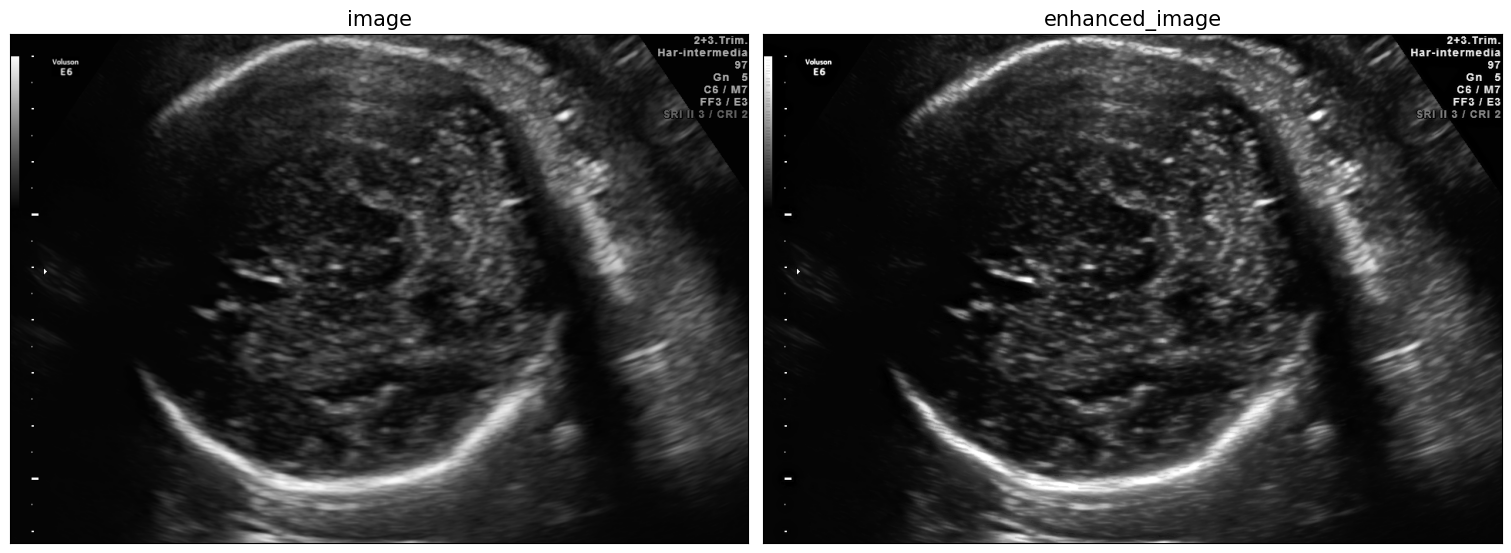

In [34]:
def mlvum(image, neighborhood_size, k):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  local_var = cv2.Laplacian(gray, cv2.CV_64F, ksize=neighborhood_size)
  low_variation_mask = local_var < k
  blurred = cv2.GaussianBlur(image, (0, 0), neighborhood_size)
  sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
  enhanced_image = np.where(low_variation_mask[..., None], sharpened, image)
  return enhanced_image

img = cv2.imread('/content/drive/MyDrive/Colab/PHD/Patient00747_Plane3_3_of_3.png',1)
neighborhood_size = 7
enhanced_image = mlvum(img, neighborhood_size, k)

plt.figure()
fig , axarr = plt.subplots(1, 2, figsize=(15, 15),constrained_layout=True, sharey=True,sharex=True)
for ax in axarr:
   ax.set_xticks([])
   ax.set_yticks([])
axarr[0].imshow(img)
axarr[0].set_title('image', fontdict={'fontsize': 15, 'fontweight': 'medium'})
axarr[1].imshow(enhanced_image)
axarr[1].set_title('enhanced_image', fontdict={'fontsize': 15, 'fontweight': 'medium'})